#CPSC 483 - Project 7
##Winston Do
This project was focused on training classification models with no labels. This unsupervious learning method made use of clustering simliar data points together. The data set used described the purchasing amount of various items. The project entailed using two unsupervised learning methods: K Means Clustering (KMC) and a hierarchical clustering method: Agglomerative Clustering (AGC).

Initial modeling using KMC used the default value of 8 clusters. However, graphing dendograms revealed that refinements could be made to these inital hyperparameters. KMC was retrained using 7 clusters.

Agglomerative clustering (AGC) with the dataset also revealed 7 clusters. Both models revealed various demographic subgroups that appeared in the clusters. 

Customer Clusters 6 and 1 would most likely purchase bear and steak which could suggest that they are a younger demogrpahic. 

Based on the spending habits of customer clusters 7 and 4, they seem to buy most items in equal measure so these customers most likely be families or have a large household.



In [38]:
#CPSC 483
#Project 7
#Winston Do

############################
#Modules and helper function block
########################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import scipy as sc
from google.colab import files

from sklearn.linear_model import LogisticRegression

def printShape(data):
  try:
    print(data.shape)
  except: 
    print('Error: printShape must be panda dataframe obj as argument')
  
def printType(obj):
  print(type(obj))


def ImportFiles(filename):
  try:
    df = pd.read_csv(filename)
    return df
  except FileNotFoundError:
    NumberOfFiles = input("File not found. Enter how many files to input and set directory:")
    for x in range(int(NumberOfFiles)):
      x = files.upload()
    df = pd.read_csv(filename)
    return df



In [39]:
###########################
#import and clean data block
###########################
df_raw = ImportFiles('spending.csv')

from sklearn.cluster import KMeans
kMeansM = KMeans().fit(df_raw)

#lables = kMeansM.labels_

df = df_raw
df['Lables'] = kMeansM.labels_

print(f"There are {1+max(kMeansM.labels_)} clusters")



There are 8 clusters


There appears to be eight clusters.

In [40]:
df_grouped = df.groupby(['Lables'])

print('mean of clusers:')
df_grouped.mean()

mean of clusers:


,apples,bananas,beer,bread,broccoli,diapers,eggs,milk,potatoes,steak
Lables,,,,,,,,,,
0,11.538462,9.923077,7.788462,12.538462,0.000000,29.557692,7.019231,7.653846,4.096154,2.711538
1,0.000000,0.000000,0.000000,0.000000,11.769231,0.000000,14.692308,4.519231,0.000000,23.711538
2,0.000000,0.000000,28.058824,2.647059,0.000000,0.000000,0.000000,0.000000,4.676471,29.735294
3,8.961538,3.692308,0.000000,0.000000,14.538462,0.000000,0.000000,0.000000,9.692308,0.000000
4,0.000000,0.000000,14.125000,1.937500,0.000000,0.000000,0.000000,0.000000,4.062500,26.250000
5,0.000000,0.000000,39.000000,2.640000,0.000000,0.000000,0.000000,0.000000,4.360000,30.120000
6,0.000000,0.000000,0.000000,0.000000,10.361702,0.000000,14.276596,4.106383,0.000000,16.063830
7,5.694444,10.138889,0.000000,0.000000,14.750000,0.000000,0.000000,0.000000,9.416667,0.000000


In [41]:
print('minimum of clusers:')
df_grouped.min()

minimum of clusers:


,apples,bananas,beer,bread,broccoli,diapers,eggs,milk,potatoes,steak
Lables,,,,,,,,,,
0,6,5,4,5,0,17,0,4,1,0
1,0,0,0,0,3,0,10,0,0,19
2,0,0,20,0,0,0,0,0,1,24
3,4,0,0,0,9,0,0,0,6,0
4,0,0,0,0,0,0,0,0,2,17
5,0,0,34,0,0,0,0,0,0,23
6,0,0,0,0,4,0,10,0,0,8
7,1,6,0,0,8,0,0,0,5,0


In [42]:
print('maximum of clusers:')
df_grouped.max()

maximum of clusers:


,apples,bananas,beer,bread,broccoli,diapers,eggs,milk,potatoes,steak
Lables,,,,,,,,,,
0,18,16,12,20,0,44,15,12,10,6
1,0,0,0,0,18,0,20,12,0,33
2,0,0,33,6,0,0,0,0,8,45
3,14,8,0,0,20,0,0,0,15,0
4,0,0,23,5,0,0,0,0,8,36
5,0,0,50,8,0,0,0,0,8,44
6,0,0,0,0,16,0,18,9,0,20
7,13,17,0,0,22,0,0,0,14,0


First and last clusters have higher than average spending compared to the other groups. The 4th and 6th cluster seems to have high beer and stake purchases suggesting a similar demographics. 

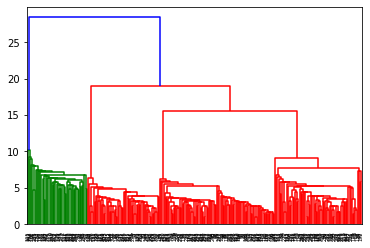

In [43]:
from scipy.cluster import hierarchy
linky = hierarchy.linkage(df)
plt.figure()
dn = hierarchy.dendrogram(linky)


There appears to be seven major clusters.

In [44]:
kMeansM_refine = KMeans(n_clusters=7).fit(df_raw)
df_refine = df_raw
df_refine['Lables'] = kMeansM_refine.labels_

print(f"There are {1+max(kMeansM_refine.labels_)} clusters")


There are 7 clusters


There appears to be seven clusters based on refininment made by observing the dendrograms.

In [45]:
from sklearn.cluster import AgglomerativeClustering

AGCluster = AgglomerativeClustering(n_clusters=8).fit(df_raw)

AGCluster.labels_

array([4, 3, 3, 0, 2, 0, 4, 1, 2, 3, 0, 5, 1, 2, 0, 5, 5, 4, 6, 1, 0, 1,
       7, 3, 1, 6, 3, 1, 2, 6, 4, 4, 1, 5, 1, 5, 2, 7, 5, 1, 0, 5, 6, 0,
       6, 1, 5, 3, 1, 4, 5, 1, 1, 0, 1, 1, 1, 3, 2, 4, 5, 4, 4, 4, 4, 5,
       1, 5, 4, 0, 2, 5, 5, 4, 1, 1, 2, 3, 5, 5, 6, 2, 0, 7, 7, 5, 4, 2,
       0, 2, 0, 7, 7, 3, 1, 5, 5, 5, 5, 5, 4, 1, 7, 6, 1, 7, 3, 5, 0, 0,
       5, 5, 5, 4, 5, 2, 6, 4, 1, 4, 1, 0, 1, 1, 2, 6, 0, 7, 4, 7, 4, 1,
       3, 3, 0, 5, 5, 4, 0, 4, 4, 1, 4, 6, 1, 1, 1, 5, 4, 3, 1, 1, 1, 4,
       1, 5, 6, 3, 6, 7, 7, 5, 3, 5, 1, 4, 4, 1, 5, 4, 3, 1, 2, 1, 1, 5,
       7, 2, 0, 5, 5, 1, 1, 1, 7, 7, 6, 0, 0, 7, 3, 5, 0, 0, 3, 3, 5, 5,
       7, 1, 6, 2, 4, 6, 0, 1, 1, 6, 1, 2, 6, 6, 6, 4, 4, 3, 7, 4, 1, 0,
       5, 4, 4, 5, 4, 6, 1, 5, 2, 4, 2, 4, 7, 7, 3, 3, 4, 5, 0, 6, 1, 3,
       6, 2, 7, 7, 7, 1, 4, 1, 1, 1, 7, 5, 4, 1, 4, 0, 5, 4, 1, 6, 3, 2,
       6, 5, 5, 3, 5, 6, 1, 2, 5, 4, 7, 4, 7, 1, 7, 1, 4, 1, 5, 1, 4, 0,
       1, 5])

In [46]:
print(f"There are {1+max(AGCluster.labels_)} clusters")

There are 8 clusters


In [47]:
df_AGC = df_raw
df_AGC['Lables'] = AGCluster.labels_

df_AGC_grouped = df_AGC.groupby(['Lables'])


print('mean of clusers:')
df_AGC_grouped.mean()

mean of clusers:


,apples,bananas,beer,bread,broccoli,diapers,eggs,milk,potatoes,steak
Lables,,,,,,,,,,
0,0.000000,0.000000,18.535714,2.214286,0.000000,0.000000,0.000000,0.000000,4.178571,27.428571
1,7.064516,7.435484,0.000000,0.000000,14.661290,0.000000,0.000000,0.000000,9.532258,0.000000
2,0.000000,0.000000,39.636364,2.590909,0.000000,0.000000,0.000000,0.000000,4.136364,30.181818
3,11.960000,10.360000,7.760000,12.000000,0.000000,25.400000,6.480000,7.320000,4.240000,2.600000
4,0.000000,0.000000,0.000000,0.000000,10.361702,0.000000,14.276596,4.106383,0.000000,16.063830
5,0.000000,0.000000,0.000000,0.000000,11.769231,0.000000,14.692308,4.519231,0.000000,23.711538
6,0.000000,0.000000,30.560000,2.720000,0.000000,0.000000,0.000000,0.000000,5.000000,30.080000
7,11.148148,9.518519,7.814815,13.037037,0.000000,33.407407,7.518519,7.962963,3.962963,2.814815


In [48]:
print('max of clusers:')
df_AGC_grouped.max()

max of clusers:


,apples,bananas,beer,bread,broccoli,diapers,eggs,milk,potatoes,steak
Lables,,,,,,,,,,
0,0,0,27,6,0,0,0,0,8,45
1,14,17,0,0,22,0,0,0,15,0
2,0,0,50,8,0,0,0,0,8,44
3,18,16,12,16,0,30,15,12,10,6
4,0,0,0,0,16,0,18,9,0,20
5,0,0,0,0,18,0,20,12,0,33
6,0,0,35,6,0,0,0,0,7,38
7,16,14,12,20,0,44,12,12,8,6


In [49]:
print('min of clusers:')
df_AGC_grouped.min()

min of clusers:


,apples,bananas,beer,bread,broccoli,diapers,eggs,milk,potatoes,steak
Lables,,,,,,,,,,
0,0,0,0,0,0,0,0,0,1,17
1,1,0,0,0,8,0,0,0,5,0
2,0,0,35,0,0,0,0,0,0,23
3,6,5,5,7,0,17,0,4,1,0
4,0,0,0,0,4,0,10,0,0,8
5,0,0,0,0,3,0,10,0,0,19
6,0,0,23,0,0,0,0,0,2,23
7,7,7,4,5,0,29,2,5,1,0


Based on the descriptive statistics on the various clusters (min, max, mean). There are various demographics that tend to buy similar items. 

Customer Clusters 6 and 1 would most likely purchase bear and meet (steak) which could suggest that they are a younger (or unhealthier) demogrpahic. These customeres are unlikely to buy anything either not beer or steak.

Based on the spending habits of customer clusters 7 and 4, they seem to buy most items in equal measure so these customers most likely have a large or diverse household, but they are unlikely to purchase broccoli.

The 0th cluster of customers seems to be more health conscientious individuals and would not purchase steak.

The 2nd cluster would be unlikely to purchase diapers.

